In [1]:
import re
import pandas as pd

In [2]:
INPUT_DIR = "input/"

In [3]:
# ref: https://www.data.jma.go.jp/gmd/risk/obsdl/index.php

df = pd.read_csv(INPUT_DIR + 'gdp.csv', header=5, encoding="shift-jis")
# df = df.rename(columns={"Unnamed: 0":"date", "Unnamed: 1":"temperature"})
df = df[['Unnamed: 0', 'GDP(Expenditure Approach)']]\
        .rename(columns={'Unnamed: 0':'quater', 'GDP(Expenditure Approach)':'gdp'})\
        .drop(df.index[[0, -1]])
df.head()

,quater,gdp
1,1994/ 1- 3.,"123,456.1"
2,4- 6.,"124,896.6"
3,7- 9.,"125,738.4"
4,10-12.,"136,825.0"
5,1995/ 1- 3.,"124,494.6"


In [4]:
def convert_figure(string):
    pattern = "\,| "
    result = re.sub(pattern, '', string)
    
    pattern = "\."
    result = re.sub(pattern, '.', result)
    return float(result)

In [5]:
df.index = pd.date_range('1994-01-01', '2020-12-31', freq="QS", name='date')
df['gdp'] = df['gdp'].apply(convert_figure)
df = df.reset_index(drop=False)

In [6]:
df_daily = pd.DataFrame(index=pd.date_range('2016-04-01', '2020-12-31', name='date')).reset_index(drop=False)
df_daily = pd.merge(df_daily, df[['date', 'gdp']], on='date', how='left').ffill()
df_daily.to_csv(INPUT_DIR + 'daily_gdp.csv', index=True)

In [7]:
df_weekly = df_daily[df_daily['date'].dt.dayofweek == 0]
df_weekly.to_csv(INPUT_DIR + 'weekly_gdp.csv', index=True)

<AxesSubplot:xlabel='date'>

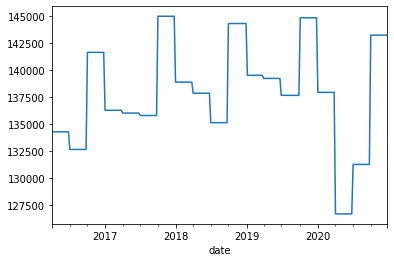

In [8]:
df_weekly.set_index('date')['gdp'].plot()